In [1]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

import os
import re

#import pandas_profiling as pp
from ydata_profiling import ProfileReport
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


import scipy
from scipy import stats
from underthesea import text_normalize
from pyvi import ViTokenizer
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from scipy.stats.stats import pearsonr

from sklearn.feature_extraction.text import TfidfVectorizer

No module named 'fasttext'


In [3]:
from Library_functions import*

2024-06-12 13:03:22.506 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-06-12 13:03:22.508 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-06-12 13:03:22.509 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


# 1. Đọc và xem dữ liệu

In [4]:
df1=pd.read_csv("dataset/1_Restaurants.csv",sep=',')
df1.head(10)

ID                                         Restaurant                                            Address           Time             Price District
0   1                  Gà Rán & Burger McDonald's Đa Kao           2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM  00:00 - 23:59  50.000 - 200.000   Quận 1
1   2  Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...  112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...  00:00 - 23:59    5.000 - 40.000   Quận 1
2   3                    Texas Chicken - Nguyễn Thái Học              115 Nguyễn Thái Học , Quận 1, TP. HCM            NaN  30.000 - 300.000   Quận 1
3   4                                       Bếp Chay 365  Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...            NaN   15.000 - 50.000   Quận 1
4   5                                 Bánh Canh Cua Linh      80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM  06:20 - 22:00   25.000 - 35.000   Quận 1
5   6             Bún Đậu Mạc Văn Khoa - Trần Quang Khải   90 Trần Quang Khải, P. Tân Định, Quận 1, TP. HCM            NaN  45.000 - 140.000   Quận 1
6   7  Bún Riêu Cua Ốc Phang Rang Ninh Thuận - Nguyễn...  66 Nguyễn Thái Bình, P. Nguyễn Thái Bình, Quận...  06:30 - 21:30   35.000 - 55.000   Quận 1
7   8                     Há Cảo Đặc Biệt Nhà Thờ Đức Bà                      86 Nguyễn Du, Quận 1, TP. HCM            NaN    5.000 - 20.000   Quận 1
8   9                       Gà Rán KFC - Nguyễn Văn Giai        2 Nguyễn Huy Tự, P. Đa Kao, Quận 1, TP. HCM            NaN   30.000 - 88.000   Quận 1
9  10  Hey Pelo - Original French Tacos - Trần Khắc Chân  Số 60 Trần Khắc Chân, P.Tân Định, Quận 1, TP. HCM            NaN  30.000 - 110.000   Quận 1

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1622 non-null   int64 
 1   Restaurant  1622 non-null   object
 2   Address     1622 non-null   object
 3   Time        773 non-null    object
 4   Price       1622 non-null   object
 5   District    1622 non-null   object
dtypes: int64(1), object(5)
memory usage: 76.2+ KB


In [6]:
df2=pd.read_csv("dataset/2_Reviews.csv",sep=',')
df2.head(10)

ID                User              Time  Rating                                            Comment  IDRestaurant
0   1             PHAN LE  20/12/2023 21:13     5.2           Gà chiên còn sống, rất tanh. Khủng khiép             1
1   2                Thúy   25/9/2023 15:43     5.0                             Đã ăn qua rồi, ăn ok ạ             1
2   3         Quyên Quyên   24/6/2023 11:11     5.0                                    Đã thư rất ngon             1
3   4         Phương Thảo  22/12/2022 14:58     1.0  Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...             1
4   5        Quỳnh Nguyễn   23/9/2022 22:40     4.2  21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...             1
5   6             Tien Le   15/9/2022 11:32     7.4  Nay có khuyến mại mua 1 tặng 1 trà kem sữa.\nU...             1
6   7                Anna     4/7/2022 1:31     1.0  Thề lâu lắm rồi t mới tức giận ntn . T có xem ...             1
7   8  Đinh Thuỵ Bích Vân   25/6/2022 20:13    10.0  Nếu đây là lần đầu bạn đến 4P thì nên thử 𝗛𝗮𝗹𝗳...             1
8   9        Huyen Nguyen   10/6/2022 12:43     1.0  Đặt giao combo C add thêm phô mai :15k - tính ...             1
9  10           B Mai Luu   19/3/2022 13:48     5.6  Hic phần cơm Mc Donald nó dở:((( nên ăn khoai ...             1

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29959 entries, 0 to 29958
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29959 non-null  int64  
 1   User          29959 non-null  object 
 2   Time          29959 non-null  object 
 3   Rating        29959 non-null  float64
 4   Comment       29958 non-null  object 
 5   IDRestaurant  29959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


# 2.Phân tích và khám phá dữ liệu

In [8]:
def check_df(dataframe, head=5):
    print("----------------------- Shape -----------------------")
    print(dataframe.shape)
    print("----------------------- Types -----------------------")
    print(dataframe.dtypes)
    print("----------------------- NA -----------------------")
    print(dataframe.isnull().sum())
    print("----------------------- Quantiles -----------------------")
    print(dataframe.describe([0.25, 0.50, 0.75]).T)

## 2.1 Phân tích df1 -> Restaurants.csv

In [9]:
df1.head()

ID                                         Restaurant                                            Address           Time             Price District
0   1                  Gà Rán & Burger McDonald's Đa Kao           2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM  00:00 - 23:59  50.000 - 200.000   Quận 1
1   2  Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...  112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...  00:00 - 23:59    5.000 - 40.000   Quận 1
2   3                    Texas Chicken - Nguyễn Thái Học              115 Nguyễn Thái Học , Quận 1, TP. HCM            NaN  30.000 - 300.000   Quận 1
3   4                                       Bếp Chay 365  Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...            NaN   15.000 - 50.000   Quận 1
4   5                                 Bánh Canh Cua Linh      80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM  06:20 - 22:00   25.000 - 35.000   Quận 1

In [10]:
check_df(df1)

----------------------- Shape -----------------------
(1622, 6)
----------------------- Types -----------------------
ID             int64
Restaurant    object
Address       object
Time          object
Price         object
District      object
dtype: object
----------------------- NA -----------------------
ID              0
Restaurant      0
Address         0
Time          849
Price           0
District        0
dtype: int64
----------------------- Quantiles -----------------------
     count   mean         std  min     25%    50%      75%     max
ID  1622.0  811.5  468.375384  1.0  406.25  811.5  1216.75  1622.0


In [11]:
df1.fillna('',inplace=True)

In [12]:
# Check nan
df1.isna().sum()

ID            0
Restaurant    0
Address       0
Time          0
Price         0
District      0
dtype: int64

In [13]:
# Check duplicates
df1.duplicated().sum()

0

In [14]:
df1.Time.unique()

array(['00:00 - 23:59', '', '06:20 - 22:00', '06:30 - 21:30',
       '06:00 - 20:00', '06:30 - 21:00', '06:00 - 21:00',
       '07:00 - 11:00 | 16:30 - 21:00', '06:15 - 22:00', '06:00 - 22:00',
       '07:00 - 21:00', '07:00 - 12:30 | 14:10 - 20:10', '05:15 - 20:15',
       '07:00 - 23:00', '06:00 - 20:45', '06:30 - 21:15', '06:00 - 21:45',
       '05:30 - 17:00', '07:00 - 20:20', '05:30 - 14:15',
       '05:30 - 14:00 | 16:00 - 23:00', '05:40 - 20:38', '07:00 - 22:30',
       '05:30 - 12:45', '06:00 - 20:55', '05:35 - 22:30', '06:30 - 16:30',
       '05:45 - 20:00', '00:00 - 01:00 | 05:30 - 23:59', '00:01 - 23:59',
       '06:00 - 22:20', '06:00 - 22:15', '06:10 - 21:00', '06:00 - 17:55',
       '06:20 - 20:30', '06:00 - 19:45', '06:00 - 22:40', '06:00 - 21:30',
       '05:00 - 11:30', '06:30 - 15:00 | 17:00 - 21:30', '06:00 - 12:00',
       '06:30 - 23:59', '06:15 - 20:30', '06:30 - 23:57', '06:45 - 21:10',
       '06:00 - 23:00', '06:50 - 20:45', '06:00 - 12:30',
       '06:30 - 12:

In [15]:
df1.Price.unique()

array(['50.000 - 200.000', '5.000 - 40.000', '30.000 - 300.000',
       '15.000 - 50.000', '25.000 - 35.000', '45.000 - 140.000',
       '35.000 - 55.000', '5.000 - 20.000', '30.000 - 88.000',
       '30.000 - 110.000', '27.000 - 100.000', '15.000 - 100.000',
       '10.000 - 100.000', '20.000 - 60.000', '60.000 - 300.000',
       '15.000 - 25.000', '5.000 - 5.000', '40.000 - 70.000',
       '10.000 - 20.000', '15.000 - 30.000', '10.000 - 25.000',
       '25.000 - 200.000', '20.000 - 33.000', '30.000 - 50.000',
       '35.000 - 50.000', '0 - 0', '10.000 - 280.000', '25.000 - 55.000',
       '10.000 - 300.000', '6.000 - 50.000', '40.000 - 65.000',
       '6.000 - 150.000', '95.000 - 150.000', '5.000 - 100.000',
       '30.000 - 45.000', '8.000 - 42.000', '10.000 - 12.000',
       '50.000 - 60.000', '29.000 - 65.000', '15.000 - 44.000',
       '40.000 - 100.000', '7.000 - 20.000', '20.000 - 50.000',
       '5.000 - 50.000', '20.000 - 30.000', '35.000 - 215.000',
       '10.000 - 180.000'

In [16]:
df1.describe().T

count   mean         std  min     25%    50%      75%     max
ID  1622.0  811.5  468.375384  1.0  406.25  811.5  1216.75  1622.0

In [17]:
df1.describe(include=[object]).T

count unique                                               top freq
Restaurant  1622   1605                           Essence - Cake & Coffee    2
Address     1622   1572  372/17 Cách Mạng Tháng 8, P. 10, Quận 3, TP. HCM    4
Time        1622    334                                                    849
Price       1622    584                                             0 - 0  208
District    1622     12                                            Quận 1  198

## 2.2 Phân tích df2 -> Review.csv

In [18]:
check_df(df2)

----------------------- Shape -----------------------
(29959, 6)
----------------------- Types -----------------------
ID                int64
User             object
Time             object
Rating          float64
Comment          object
IDRestaurant      int64
dtype: object
----------------------- NA -----------------------
ID              0
User            0
Time            0
Rating          0
Comment         1
IDRestaurant    0
dtype: int64
----------------------- Quantiles -----------------------
                count          mean          std  min     25%      50%      75%      max
ID            29959.0  14980.000000  8648.562694  1.0  7490.5  14980.0  22469.5  29959.0
Rating        29959.0      7.089149     2.353754  0.0     6.0      7.6      8.8     10.0
IDRestaurant  29959.0    665.849895   451.655237  1.0   192.0    605.0   1037.0   1612.0


In [19]:
df2.fillna('',inplace=True)

In [20]:
# Check duplicates
df2.duplicated().sum()

0

In [21]:
df2.describe(include=[object]).T

count unique              top freq
User     29959  14027  Dân Bích Chương  170
Time     29959  29099  24/6/2023 11:21    9
Comment  29959  28475   Nem nướng ngon  239

## 2.3 Pre-Process data

In [22]:
df1.isnull().sum()

ID            0
Restaurant    0
Address       0
Time          0
Price         0
District      0
dtype: int64

In [23]:
df1[['minPrice', 'maxPrice']] = df1['Price'].str.replace('.', '', regex=False).str.split(' - ', expand=True).astype(float)

In [24]:
df1.head()

ID                                         Restaurant                                            Address           Time             Price District  minPrice  maxPrice
0   1                  Gà Rán & Burger McDonald's Đa Kao           2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM  00:00 - 23:59  50.000 - 200.000   Quận 1   50000.0  200000.0
1   2  Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...  112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...  00:00 - 23:59    5.000 - 40.000   Quận 1    5000.0   40000.0
2   3                    Texas Chicken - Nguyễn Thái Học              115 Nguyễn Thái Học , Quận 1, TP. HCM                 30.000 - 300.000   Quận 1   30000.0  300000.0
3   4                                       Bếp Chay 365  Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...                  15.000 - 50.000   Quận 1   15000.0   50000.0
4   5                                 Bánh Canh Cua Linh      80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM  06:20 - 22:00   25.000 - 35.000   Quận 1   25000.0   35000.0

In [25]:
df1 = df1.rename(columns={'ID': 'IDRestaurant'})

In [26]:
df1.head()

IDRestaurant                                         Restaurant                                            Address           Time             Price District  minPrice  maxPrice
0             1                  Gà Rán & Burger McDonald's Đa Kao           2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM  00:00 - 23:59  50.000 - 200.000   Quận 1   50000.0  200000.0
1             2  Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...  112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...  00:00 - 23:59    5.000 - 40.000   Quận 1    5000.0   40000.0
2             3                    Texas Chicken - Nguyễn Thái Học              115 Nguyễn Thái Học , Quận 1, TP. HCM                 30.000 - 300.000   Quận 1   30000.0  300000.0
3             4                                       Bếp Chay 365  Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...                  15.000 - 50.000   Quận 1   15000.0   50000.0
4             5                                 Bánh Canh Cua Linh      80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM  06:20 - 22:00   25.000 - 35.000   Quận 1   25000.0   35000.0

In [27]:
# Kết hợp hai DataFrames dựa trên cột 'IDRestaurant'
df2 = df2.merge(df1[['IDRestaurant', 'Restaurant']], on='IDRestaurant', how='left')

In [28]:
df2.head()

ID          User              Time  Rating                                            Comment  IDRestaurant                         Restaurant
0   1       PHAN LE  20/12/2023 21:13     5.2           Gà chiên còn sống, rất tanh. Khủng khiép             1  Gà Rán & Burger McDonald's Đa Kao
1   2          Thúy   25/9/2023 15:43     5.0                             Đã ăn qua rồi, ăn ok ạ             1  Gà Rán & Burger McDonald's Đa Kao
2   3   Quyên Quyên   24/6/2023 11:11     5.0                                    Đã thư rất ngon             1  Gà Rán & Burger McDonald's Đa Kao
3   4   Phương Thảo  22/12/2022 14:58     1.0  Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...             1  Gà Rán & Burger McDonald's Đa Kao
4   5  Quỳnh Nguyễn   23/9/2022 22:40     4.2  21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...             1  Gà Rán & Burger McDonald's Đa Kao

In [29]:
df = df2

In [30]:
# Lưu dữ liệu tạm chưa xử lý
df.to_csv('dataset/pre_processed_data.csv', index=False)

In [31]:
# Đọc lại dữ liệu để bắt đầu xử lý
df = pd.read_csv('dataset/pre_processed_data.csv')
# Xem dữ liệu
df.head()

ID          User              Time  Rating                                            Comment  IDRestaurant                         Restaurant
0   1       PHAN LE  20/12/2023 21:13     5.2           Gà chiên còn sống, rất tanh. Khủng khiép             1  Gà Rán & Burger McDonald's Đa Kao
1   2          Thúy   25/9/2023 15:43     5.0                             Đã ăn qua rồi, ăn ok ạ             1  Gà Rán & Burger McDonald's Đa Kao
2   3   Quyên Quyên   24/6/2023 11:11     5.0                                    Đã thư rất ngon             1  Gà Rán & Burger McDonald's Đa Kao
3   4   Phương Thảo  22/12/2022 14:58     1.0  Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...             1  Gà Rán & Burger McDonald's Đa Kao
4   5  Quỳnh Nguyễn   23/9/2022 22:40     4.2  21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...             1  Gà Rán & Burger McDonald's Đa Kao

In [32]:
# check duplicate
df.duplicated().sum()

0

In [33]:
df.rename(columns={'Comment': 'comment'}, inplace=True)
df.rename(columns={'Rating': 'rating'}, inplace=True)

In [34]:
# Remove punctuation
df['comment'] = df['comment'].replace('[^\w\s]', ' ', regex=True)
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
for char in punctuation:
    df['comment'] = df['comment'].replace(char, ' ')

In [35]:
# Remove numbers, only keep letters
df['comment'] = df['comment'].replace('[\w]*\d+[\w]*', '', regex=True)

In [36]:
# Some lines start with a space, remove them
df['comment'] = df['comment'].replace('^[\s]{1,}', '', regex=True)

In [37]:
# Remove multiple spaces with one space
df['comment'] = df['comment'].replace('[\s]{2,}', ' ', regex=True)

In [38]:
# Some lines end with a space, remove them
df['comment'] = df['comment'].replace('[\s]{1,}$', '', regex=True)

In [39]:
# Remove end of line characters
df['comment'] = df['comment'].replace(r'[\r\n]+', ' ', regex=True)

In [40]:
# Remove HTTP links
df['comment'] = df['comment'].replace(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '',
                                      regex=True)

In [41]:
# Remove rows that are empty
df = df[df['comment'].str.len() > 0]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29932 entries, 0 to 29958
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29932 non-null  int64  
 1   User          29932 non-null  object 
 2   Time          29932 non-null  object 
 3   rating        29932 non-null  float64
 4   comment       29932 non-null  object 
 5   IDRestaurant  29932 non-null  int64  
 6   Restaurant    29932 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ MB


In [43]:
# Thêm cột độ dài của chuỗi
df['comment_len'] = df['comment'].str.len()

In [44]:
# Thêm cột độ dài của từ
df['comment_lenword'] = df['comment'].str.split().str.len()

In [45]:
# Thêm cột trung bình độ dài từ
df['comment_avgword'] = df['comment_len'] / df['comment_lenword']

In [46]:
# Reset index
df.reset_index(drop=True, inplace=True)

# Check outlier

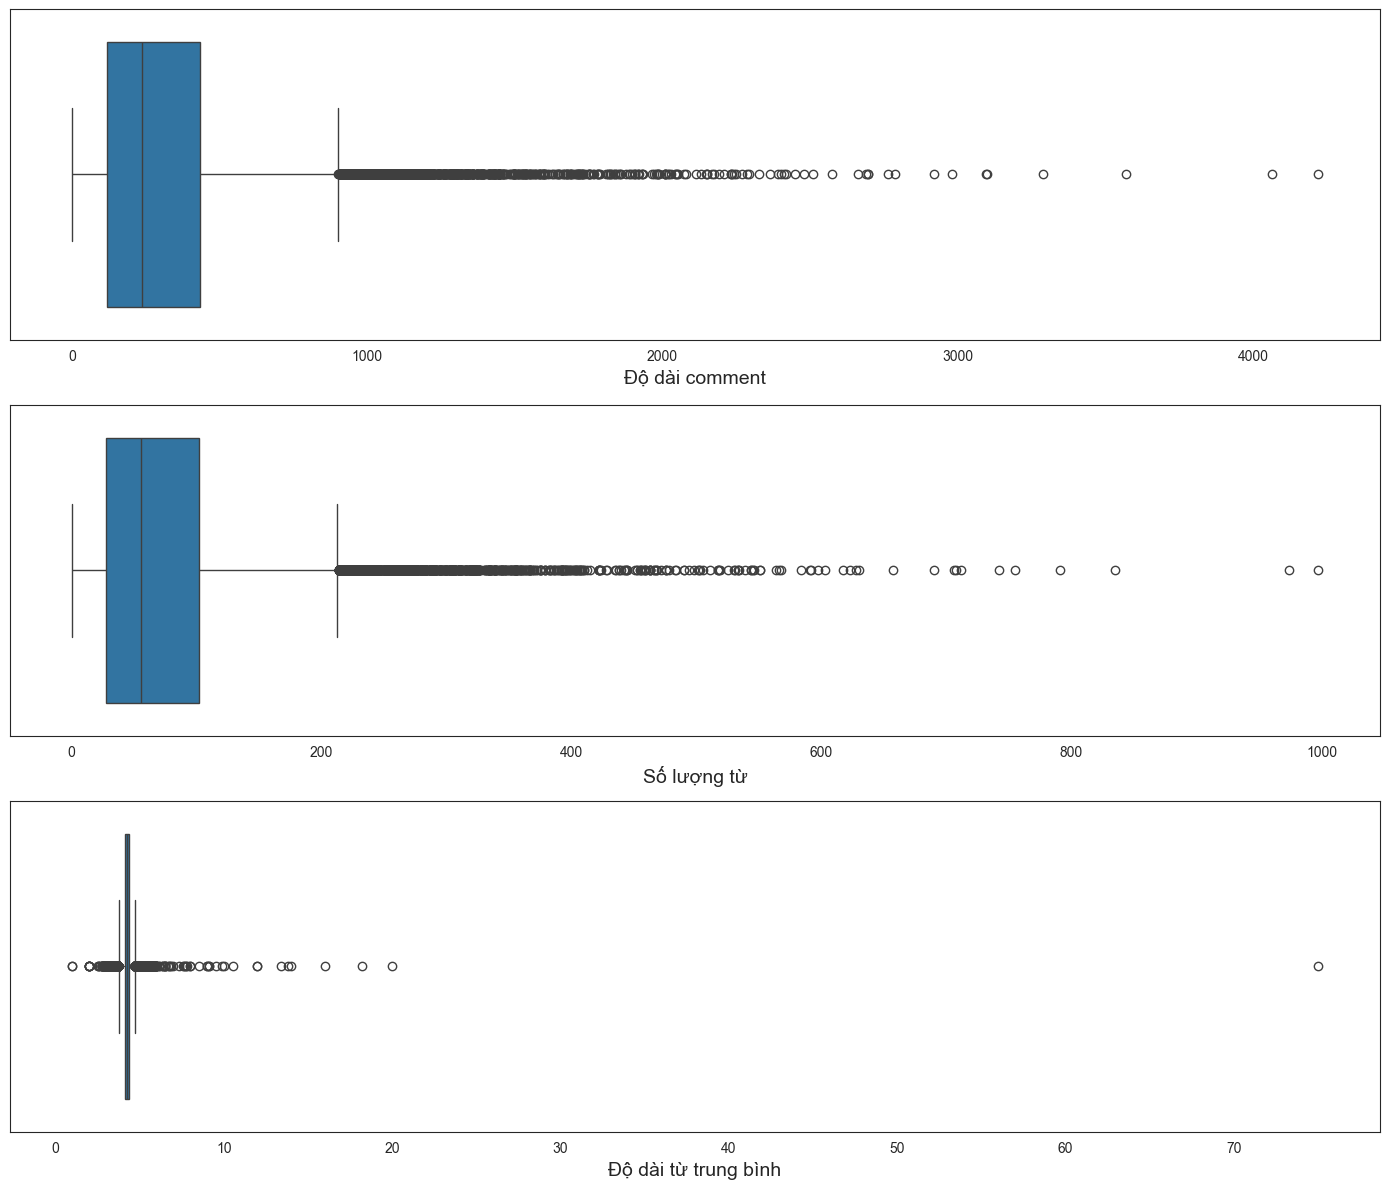

In [47]:
# Phân bố số lượng từ trong comment

fig = plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
sns.boxplot(data=df , x='comment_len')
plt.xlabel('Độ dài comment',fontsize=14)

plt.subplot(3,1,2)
sns.boxplot(data=df , x='comment_lenword')
plt.xlabel('Số lượng từ',fontsize=14)

plt.subplot(3,1,3)
sns.boxplot(data=df , x='comment_avgword')
plt.xlabel('Độ dài từ trung bình',fontsize=14)
plt.tight_layout()
plt.show()

In [48]:
check_outlier(df['comment_len'])

Q1:        119.0
Q3:        432.0
IQR:       313.0
# Number of upper outliers:  1120
# Number of lower outliers:  0
# Percentage of ouliers:     0.037418147801683815


In [49]:
check_outlier(df['comment_lenword'])

Q1:        28.0
Q3:        102.0
IQR:       74.0
# Number of upper outliers:  1143
# Number of lower outliers:  0
# Percentage of ouliers:     0.03818655619403982


In [50]:
check_outlier(df['comment_avgword'])

Q1:        4.111111111111111
Q3:        4.354494572591587
IQR:       0.24338346148047663
# Number of upper outliers:  593
# Number of lower outliers:  1315
# Percentage of ouliers:     0.06374448750501135


In [51]:
remove_outlier('comment_len',df)
remove_outlier('comment_lenword',df)
remove_outlier('comment_avgword',df)

ID           User              Time  rating                                            comment  IDRestaurant                                         Restaurant  comment_len  comment_lenword  comment_avgword
0          3    Quyên Quyên   24/6/2023 11:11     5.0                                    Đã thư rất ngon             1                  Gà Rán & Burger McDonald's Đa Kao           15                4         3.750000
1          4    Phương Thảo  22/12/2022 14:58     1.0  Tệ mua mang về cho gói tương ớt Và xin thêm kh...             1                  Gà Rán & Burger McDonald's Đa Kao          205               47         4.361702
2          5   Quỳnh Nguyễn   23/9/2022 22:40     4.2  đứa nhỏ kêu đói sau hồi bình loạn là chốt McDo...             1                  Gà Rán & Burger McDonald's Đa Kao          216               53         4.075472
3          6        Tien Le   15/9/2022 11:32     7.4  Nay có khuyến mại mua tặng trà kem sữa Uống ok...             1                  Gà Rán & Burger McDonald's Đa Kao           60               15         4.000000
4          7           Anna     4/7/2022 1:31     1.0  Thề lâu lắm rồi t mới tức giận ntn T có xem qu...             1                  Gà Rán & Burger McDonald's Đa Kao          617              144         4.284722
...      ...            ...               ...     ...                                                ...           ...                                                ...          ...              ...              ...
26847  29955     Trannuhamy  26/10/2020 12:16     7.0  Đặt quán bún thái này trong chương trình của c...          1595       Tiên Tiên - Bún Thái Cay - Tân Chánh Hiệp 16          182               39         4.666667
26848  29956         Phương    1/6/2021 15:34    10.0  Bánh ngon nóng Giao hàng nhanh Giá phải chăng ...          1609  3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...           52               11         4.727273
26849  29957             Tú   31/1/2021 14:29     3.4  Phục vụ quá tệ Pizza xúc xích double phô mai m...          1609  3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...          151               36         4.194444
26850  29958  Hoàng Hậu Mai  27/10/2020 18:06     7.6  Đang thèm gà rán thì lướt trúng ngay combo gà ...          1609  3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...          326               73         4.465753
26851  29959      ThoA Thai  19/10/2021 16:27    10.0  Đây là quán bún chả ngon nhất ở Sài Gòn mà mìn...          1612            Đàm Trang - Bún Chả - Tân Chánh Hiệp 10          118               29         4.068966

[26852 rows x 10 columns]

In [52]:
##LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [53]:
t0=datetime.datetime.now()

In [54]:
# # Xử lý tiếng việt thô
df['comment'] = df['comment'].apply(lambda x: process_text(x, emoji_dict, teen_dict, wrong_lst))

In [55]:
# Chuẩn hóa unicode tiếng việt
df['comment'] = df['comment'].apply(lambda x: covert_unicode(x))

In [56]:
# Kí tự đặc biệt
df['comment'] = df['comment'].apply(lambda x: process_special_word(x))

In [57]:
# postag_thesea
df['comment'] = df['comment'].apply(lambda x: process_postag_thesea(x))

In [58]:
#  remove stopword vietnames
df['comment'] = df['comment'].apply(lambda x: remove_stopword(x,stopwords_lst))

In [59]:
now = datetime.datetime.now()
print('Xử lý tiếng việt mất : ',now-t0)

Xử lý tiếng việt mất :  0:08:45.930344


In [60]:
df.head()

ID          User              Time  rating                                            comment  IDRestaurant                         Restaurant  comment_len  comment_lenword  comment_avgword
0   3   Quyên Quyên   24/6/2023 11:11     5.0                                                thư             1  Gà Rán & Burger McDonald's Đa Kao           15                4         3.750000
1   4   Phương Thảo  22/12/2022 14:58     1.0  tệ gói tương_ớt tương_về tương món gói không_h...             1  Gà Rán & Burger McDonald's Đa Kao          205               47         4.361702
2   5  Quỳnh Nguyễn   23/9/2022 22:40     4.2  kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...             1  Gà Rán & Burger McDonald's Đa Kao          216               53         4.075472
3   6       Tien Le   15/9/2022 11:32     7.4                 khuyến_mại tặng trà sữa uống đồ_ăn             1  Gà Rán & Burger McDonald's Đa Kao           60               15         4.000000
4   7          Anna     4/7/2022 1:31     1.0  thề lắm tức_giận thế_này quảng_cáo minion háo_...             1  Gà Rán & Burger McDonald's Đa Kao          617              144         4.284722

In [61]:
df.isna().sum()

ID                 0
User               0
Time               0
rating             0
comment            0
IDRestaurant       0
Restaurant         0
comment_len        0
comment_lenword    0
comment_avgword    0
dtype: int64

In [62]:
df.dropna(inplace=True)

# 4. Trực quan hoá dữ liệu

In [63]:
# # Sử dụng pandas_profiling
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
group_count=df['rating'].value_counts()
group_count

rating
10.0    2965
8.0     1788
7.0     1577
5.0     1226
7.4     1189
7.6     1169
7.2     1132
7.8     1117
9.0     1115
1.0     1059
8.2      977
8.4      810
8.6      790
6.8      721
8.8      715
9.6      657
6.0      654
9.2      594
6.6      579
9.4      575
9.8      539
6.4      478
4.2      421
6.2      404
3.4      389
5.8      258
2.6      245
5.6      231
4.8      204
3.8      197
4.6      194
4.4      194
4.0      188
5.4      187
3.6      153
3.0      148
1.8      144
3.2      134
5.2      132
2.0      120
2.2      115
2.8      110
2.4       81
1.2       59
1.6       58
1.4       54
0.0        6
Name: count, dtype: int64

<BarContainer object of 47 artists>

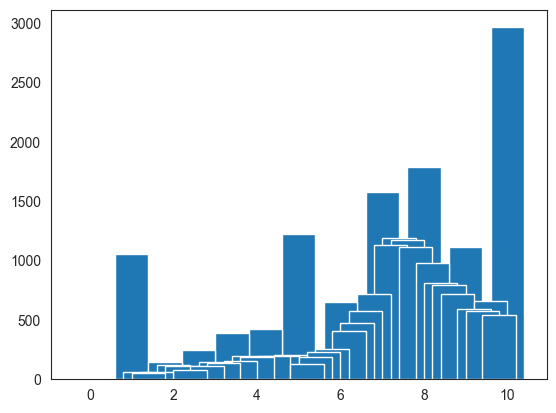

In [65]:
plt.bar(group_count.index,group_count)

### 5. Tạo wordcloud của Positive và Negative comment. In danh sách 20 từ có trọng số lớn (chữ to) trong wordcloud. Trực quan hóa dữ liệu wordcloud.

In [66]:
## Negative
neg_ratings=df[df.rating<5]

In [67]:
neg_words=[]
for t in neg_ratings.comment:
    neg_words.append(t)
neg_words[:4]    

['tệ gói tương_ớt tương_về tương món gói không_hoạt_chuỗi tiệm',
 'kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượt thành thế_này cơm sống toàn_tập cơm gạo_ức',
 'thề lắm tức_giận thế_này quảng_cáo minion háo_hức hàng truyện truyện truyện chú_ý minion báo hủy đơn giùm hành_động không_tôn_trọng khách_hàng bấm hủy đơn không_bị ảnh_hưởng vận_hành app đâuuu không_nhân_viên kệ đồ_chơi kệ tiền tiền không_vậy xứng_đáng đêm_hôm lừa_đảo',
 'add phô_tính tiền đầy_đủ món không_thấy làm_ăn trộm_cắp khách_hàng không_cấp món phường']

In [68]:
neg_text=pd.Series(neg_words).str.cat(sep=' ')
neg_text[:120]

'tệ gói tương_ớt tương_về tương món gói không_hoạt_chuỗi tiệm kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượt thành thế_n'

In [69]:
## instantiate a wordcloud object
wc =WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stopwords_lst,
    width=1600,height=800,
    max_font_size=200)

wc.generate(neg_text)

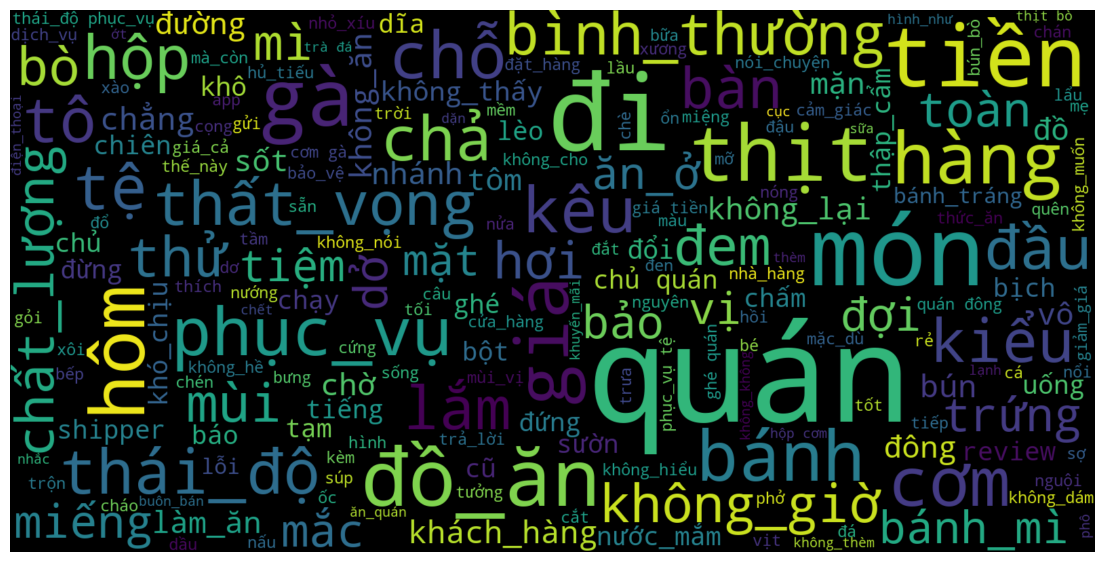

In [70]:
## Display the wordcloud
plt.figure(figsize=(14,16))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
wc.words_

{'quán': 1.0,
 'đi': 0.5495098039215687,
 'món': 0.4627450980392157,
 'tiền': 0.34852941176470587,
 'gà': 0.3073529411764706,
 'đồ_ăn': 0.30686274509803924,
 'thịt': 0.2857843137254902,
 'hôm': 0.26715686274509803,
 'giá': 0.2553921568627451,
 'hàng': 0.24215686274509804,
 'bánh': 0.23431372549019608,
 'cơm': 0.22254901960784312,
 'phục_vụ': 0.2142156862745098,
 'chỗ': 0.2034313725490196,
 'kêu': 0.19264705882352942,
 'thái_độ': 0.1857843137254902,
 'tệ': 0.1843137254901961,
 'chả': 0.18333333333333332,
 'tô': 0.18137254901960784,
 'thất_vọng': 0.17450980392156862,
 'hộp': 0.17401960784313725,
 'kiểu': 0.17107843137254902,
 'lắm': 0.17009803921568628,
 'đầu': 0.17009803921568628,
 'bình_thường': 0.15784313725490196,
 'bàn': 0.14901960784313725,
 'thử': 0.1411764705882353,
 'đem': 0.13872549019607844,
 'mùi': 0.13284313725490196,
 'bò': 0.13088235294117648,
 'không_giờ': 0.12990196078431374,
 'chất_lượng': 0.12941176470588237,
 'hơi': 0.12205882352941176,
 'mì': 0.11715686274509804,
 't

In [72]:
first_20_big_words={k:wc.words_[k] for k in list(wc.words_)[:20]}
first_20_big_words
first_20_big_words.items()

dict_items([('quán', 1.0), ('đi', 0.5495098039215687), ('món', 0.4627450980392157), ('tiền', 0.34852941176470587), ('gà', 0.3073529411764706), ('đồ_ăn', 0.30686274509803924), ('thịt', 0.2857843137254902), ('hôm', 0.26715686274509803), ('giá', 0.2553921568627451), ('hàng', 0.24215686274509804), ('bánh', 0.23431372549019608), ('cơm', 0.22254901960784312), ('phục_vụ', 0.2142156862745098), ('chỗ', 0.2034313725490196), ('kêu', 0.19264705882352942), ('thái_độ', 0.1857843137254902), ('tệ', 0.1843137254901961), ('chả', 0.18333333333333332), ('tô', 0.18137254901960784), ('thất_vọng', 0.17450980392156862)])

In [73]:
df_first_20_big_words=pd.DataFrame(list(first_20_big_words.items()),columns=['word','freq'])
df_first_20_big_words.head()

word      freq
0  quán  1.000000
1    đi  0.549510
2   món  0.462745
3  tiền  0.348529
4    gà  0.307353

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

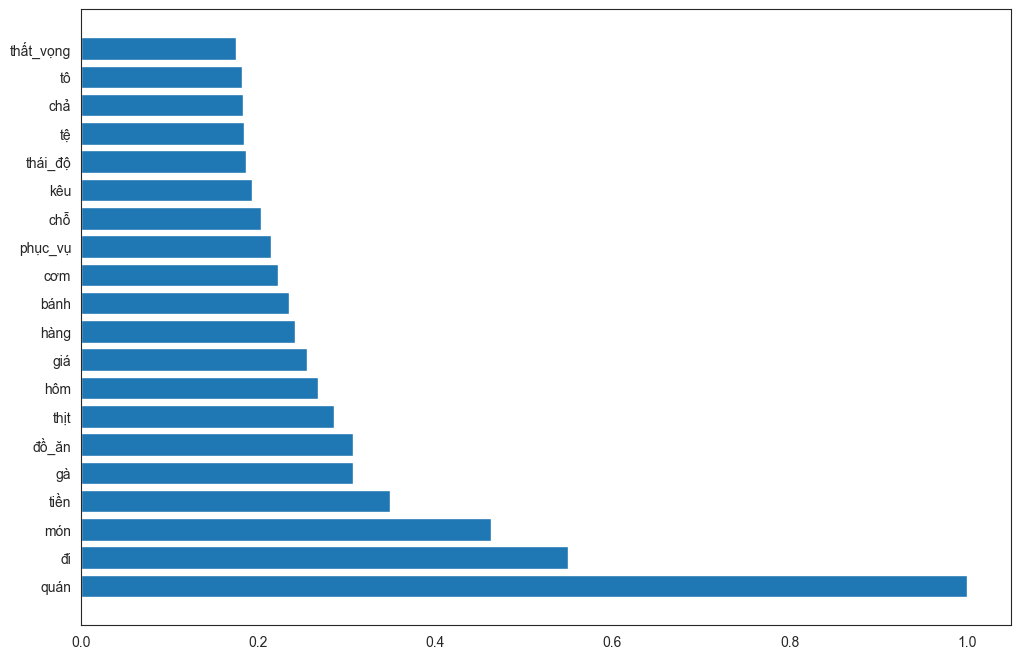

In [74]:
plt.figure(figsize=(12,8))
plt.barh(df_first_20_big_words.word,df_first_20_big_words.freq)
plt.xticks(rotation='90')
plt.show()

In [ ]:
## Positive
pos_ratings=df[df.rating>5]

In [ ]:
pos_words=[]
for t in pos_ratings.comment:
    pos_words.append(t)
pos_words[:4]    

['đầu thử vị thần_thánh đồ_ăn hơi kén đầu không_miệng nghiện bến thành anuongsaigon',
 'đi tại_chỗ cá tặng app cảm_nhận ngán_không_hấp lắm app ứng_dụng quầy_toán món giá hời lẻ món gà rán_tây lắc nước_ngọt sundae lẻ gà tươi quá_xá bữa tuần nê_vẻ hài_lòng',
 'thương_hiệu fastfood nhẵn_mặt mê gà rán tây gà rán giòn dầu ngấy thịt gà mềm thơm_chấm tương ưu_đãi rẻ hú_hồn địa_gà rán thôi_ý đại_hội gà rán không_bị_xót ví_yêu dấu thích gà uống xí',
 'phở vỏ bánh hơi khô vỏ truyền_thống sốt đậm mùi phở phở ăn_liền vifon thử đồ uống trà dứa nhạt_nhẽo cốt trà mùi dứa nhân_tạo kẹo thạch gà_tây chiên giòn_rụm']

In [ ]:
pos_text=pd.Series(pos_words).str.cat(sep=' ')
pos_text[:120]

'đầu thử vị thần_thánh đồ_ăn hơi kén đầu không_miệng nghiện bến thành anuongsaigon đi tại_chỗ cá tặng app cảm_nhận ngán_k'

In [ ]:
## instantiate a wordcloud object
wc_pos =WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stopwords_lst,
    width=1600,height=800,
    max_font_size=200)

wc_pos.generate(pos_text)

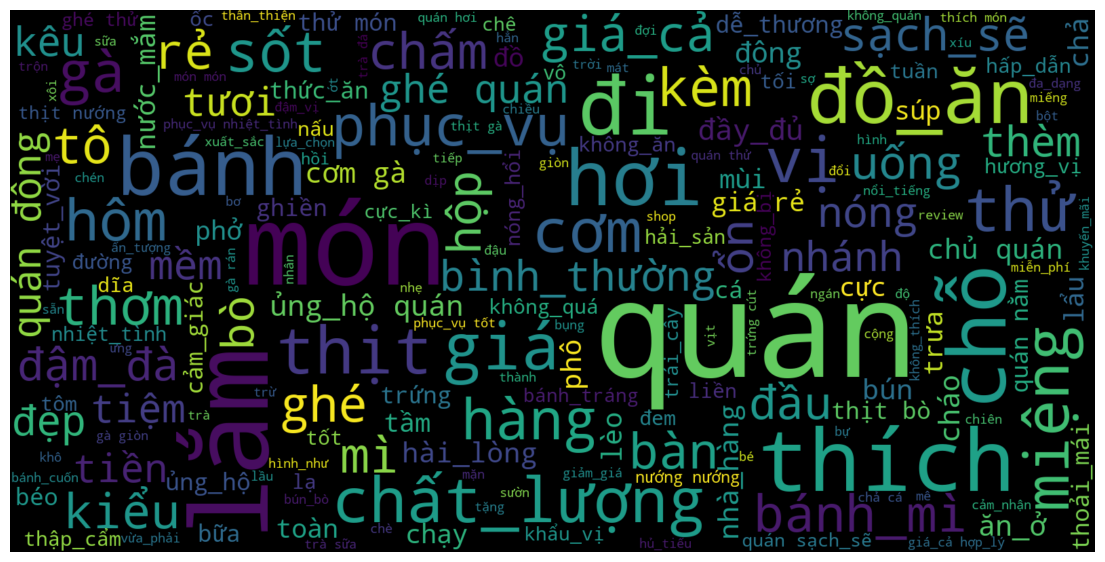

In [ ]:
## Display the wordcloud
plt.figure(figsize=(14,16))
plt.imshow(wc_pos,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wc.words_

{'quán': 1.0,
 'đi': 0.5486486486486486,
 'món': 0.4735135135135135,
 'tiền': 0.35243243243243244,
 'đồ_ăn': 0.32594594594594595,
 'gà': 0.30594594594594593,
 'thịt': 0.27405405405405403,
 'hôm': 0.2708108108108108,
 'hàng': 0.2491891891891892,
 'giá': 0.24,
 'bánh': 0.2308108108108108,
 'cơm': 0.22594594594594594,
 'thái_độ': 0.20864864864864865,
 'phục_vụ': 0.20864864864864865,
 'tệ': 0.20162162162162162,
 'chỗ': 0.19567567567567568,
 'kêu': 0.19243243243243244,
 'chả': 0.1891891891891892,
 'tô': 0.1854054054054054,
 'hộp': 0.1827027027027027,
 'đầu': 0.17567567567567569,
 'thất_vọng': 0.1745945945945946,
 'kiểu': 0.17351351351351352,
 'lắm': 0.1535135135135135,
 'bình_thường': 0.15027027027027026,
 'bàn': 0.14972972972972973,
 'chất_lượng': 0.14864864864864866,
 'đem': 0.14432432432432432,
 'mùi': 0.14162162162162162,
 'không_giờ': 0.13675675675675675,
 'thử': 0.1335135135135135,
 'mì': 0.12216216216216216,
 'toàn': 0.11783783783783784,
 'trứng': 0.11567567567567567,
 'bò': 0.112432

In [ ]:
first_20_pos_big_words={k:wc_pos.words_[k] for k in list(wc_pos.words_)[:20]}
first_20_pos_big_words

{'quán': 1.0,
 'món': 0.6627522935779816,
 'lắm': 0.5974311926605504,
 'thích': 0.36385321100917434,
 'đi': 0.3181651376146789,
 'chỗ': 0.31577981651376147,
 'bánh': 0.30660550458715596,
 'hơi': 0.2831192660550459,
 'đồ_ăn': 0.27357798165137615,
 'thịt': 0.20146788990825687,
 'giá': 0.20073394495412844,
 'vị': 0.18385321100917432,
 'chất_lượng': 0.18256880733944955,
 'miệng': 0.17688073394495413,
 'thử': 0.17376146788990826,
 'cơm': 0.1730275229357798,
 'hôm': 0.15155963302752293,
 'gà': 0.1511926605504587,
 'hàng': 0.14825688073394497,
 'phục_vụ': 0.14770642201834863}

In [ ]:
df_first_20_pos_big_words=pd.DataFrame(list(first_20_pos_big_words.items()),columns=['word','freq'])
df_first_20_pos_big_words.head()

word      freq
0   quán  1.000000
1    món  0.662752
2    lắm  0.597431
3  thích  0.363853
4     đi  0.318165

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

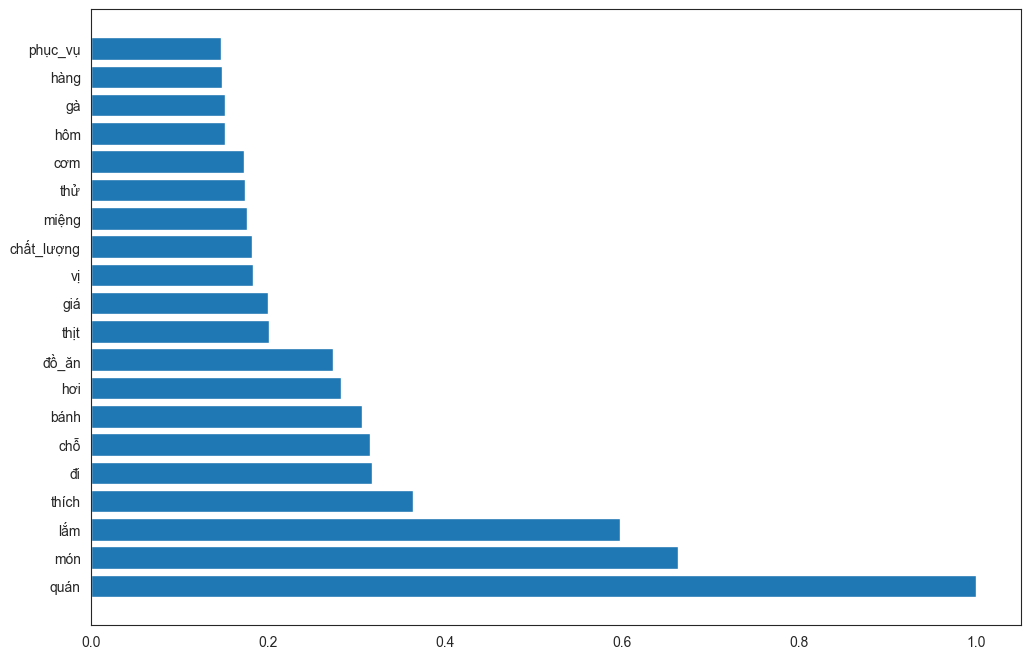

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(df_first_20_pos_big_words.word,df_first_20_pos_big_words.freq)
plt.xticks(rotation='90')
plt.show()

In [75]:
df=df[df.rating!=5]
df.shape

(25626, 10)

In [76]:
df['class']=np.where(df['rating']>=5,'Like','Dislike')
df.head()

ID                User              Time  rating                                            comment  IDRestaurant                         Restaurant  comment_len  comment_lenword  comment_avgword    class
1   4         Phương Thảo  22/12/2022 14:58     1.0  tệ gói tương_ớt tương_về tương món gói không_h...             1  Gà Rán & Burger McDonald's Đa Kao          205               47         4.361702  Dislike
2   5        Quỳnh Nguyễn   23/9/2022 22:40     4.2  kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...             1  Gà Rán & Burger McDonald's Đa Kao          216               53         4.075472  Dislike
3   6             Tien Le   15/9/2022 11:32     7.4                 khuyến_mại tặng trà sữa uống đồ_ăn             1  Gà Rán & Burger McDonald's Đa Kao           60               15         4.000000     Like
4   7                Anna     4/7/2022 1:31     1.0  thề lắm tức_giận thế_này quảng_cáo minion háo_...             1  Gà Rán & Burger McDonald's Đa Kao          617              144         4.284722  Dislike
5   8  Đinh Thuỵ Bích Vân   25/6/2022 20:13    10.0  đầu thử vị thần_thánh đồ_ăn hơi kén đầu không_...             1  Gà Rán & Burger McDonald's Đa Kao          388               92         4.217391     Like

In [77]:
df['Sentiment']=np.where(df['class'] == 'Like',1,0)
df.head()

ID                User              Time  rating                                            comment  IDRestaurant                         Restaurant  comment_len  comment_lenword  comment_avgword    class  Sentiment
1   4         Phương Thảo  22/12/2022 14:58     1.0  tệ gói tương_ớt tương_về tương món gói không_h...             1  Gà Rán & Burger McDonald's Đa Kao          205               47         4.361702  Dislike          0
2   5        Quỳnh Nguyễn   23/9/2022 22:40     4.2  kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...             1  Gà Rán & Burger McDonald's Đa Kao          216               53         4.075472  Dislike          0
3   6             Tien Le   15/9/2022 11:32     7.4                 khuyến_mại tặng trà sữa uống đồ_ăn             1  Gà Rán & Burger McDonald's Đa Kao           60               15         4.000000     Like          1
4   7                Anna     4/7/2022 1:31     1.0  thề lắm tức_giận thế_này quảng_cáo minion háo_...             1  Gà Rán & Burger McDonald's Đa Kao          617              144         4.284722  Dislike          0
5   8  Đinh Thuỵ Bích Vân   25/6/2022 20:13    10.0  đầu thử vị thần_thánh đồ_ăn hơi kén đầu không_...             1  Gà Rán & Burger McDonald's Đa Kao          388               92         4.217391     Like          1

In [78]:
# def func_class(s):
#     if s>=7.5:
#         return "Like"
#     elif s<=4.5:
#         return "Dislike"
#     return "Neutral"

# df["class"]=df["Rating"].apply(lambda x: func_class(x))
# df.head()

In [ ]:
# def func_sentiment(s):
#     if s == "Like":
#         return 2
#     elif s == "Neutral":
#         return 1
#     return 0

# df["Sentiment"]=df["class"].apply(lambda x: func_sentiment(x))
# df.head()

ID          User              Time  Rating                                            comment  IDRestaurant                         Restaurant  comment_len  comment_lenword  comment_avgword    class  Sentiment
0   3   Quyên Quyên   24/6/2023 11:11     5.0                                                thư             1  Gà Rán & Burger McDonald's Đa Kao           15                4         3.750000  Neutral          1
1   4   Phương Thảo  22/12/2022 14:58     1.0  tệ gói tương_ớt tương_về tương món gói không_h...             1  Gà Rán & Burger McDonald's Đa Kao          205               47         4.361702  Dislike          0
2   5  Quỳnh Nguyễn   23/9/2022 22:40     4.2  kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...             1  Gà Rán & Burger McDonald's Đa Kao          216               53         4.075472  Dislike          0
3   6       Tien Le   15/9/2022 11:32     7.4                 khuyến_mại tặng trà sữa uống đồ_ăn             1  Gà Rán & Burger McDonald's Đa Kao           60               15         4.000000  Neutral          1
4   7          Anna     4/7/2022 1:31     1.0  thề lắm tức_giận thế_này quảng_cáo minion háo_...             1  Gà Rán & Burger McDonald's Đa Kao          617              144         4.284722  Dislike          0

In [79]:
df.dropna(inplace=True)
df.drop_duplicates(subset='comment',inplace=True)

In [80]:
df=df[['rating','comment','class','Sentiment']]

In [81]:
# Lưu dữ liệu sau khi xử lý
df.to_csv('dataset/processed_data.csv', index=False)